

*   initial libs and check for missing values
*   Visualizing bitcoin data
*   reverse ordering by date of dataFrame rows and reset index
*   convert date column format
*   split data set to train and test
*   test models (linear regression, lasso, ridge,SVR)
*   face book prophet
*   XG Boost
*   LSTM



# initial libs and check for missing values

In [157]:
import pandas as pd
import numpy as np
from datetime import datetime
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import math
from fbprophet import Prophet
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

plt.style.use('seaborn-darkgrid')
drive.mount('/content/drive')
path='/content/drive/MyDrive/DataSets/BitcoinHistoricalDataInvesting.csv'

df=pd.read_csv(path)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           Date    Price     Open     High      Low     Vol. Change %
0  May 01, 2021  57807.1  57719.1  58449.4  57029.5   63.41K    0.15%
1  Apr 30, 2021  57720.3  53562.3  57925.6  53088.7  103.74K    7.77%
2  Apr 29, 2021  53560.8  54838.6  55173.7  52400.0   83.90K   -2.34%
3  Apr 28, 2021  54841.4  55036.0  56419.9  53876.4   86.96K   -0.35%
4  Apr 27, 2021  55036.5  54011.1  55427.8  53345.0   84.08K    1.88%


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3941 non-null   object 
 1   Price     3941 non-null   float64
 2   Open      3941 non-null   float64
 3   High      3941 non-null   float64
 4   Low       3941 non-null   float64
 5   Vol.      3941 non-null   object 
 6   Change %  3941 non-null   object 
dtypes: float64(4), object(3)
memory usage: 215.6+ KB


Price feature is Close value of candel

In [159]:
df.isnull().any()

Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

# reverse ordering of dataFrame rows and reset index

In [160]:
df = df[::-1].reset_index(drop = True) 

# Visualizing bitcoin data

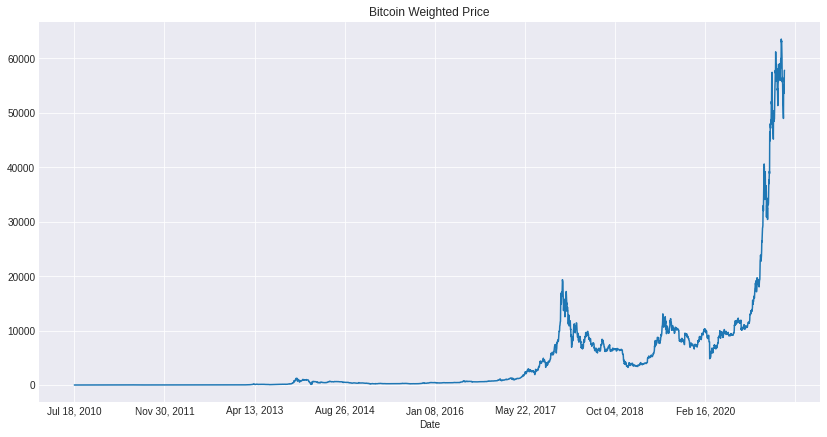

In [161]:
df.set_index("Date").Price.plot(figsize=(14,7), title="Bitcoin Weighted Price")

# convert date column format

In [162]:
df['Date']= df['Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y').strftime('%Y-%m-%d'))

In [163]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%
1,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%
2,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
3,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
4,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%


nake copy from data fram

In [164]:
df_copy = df.copy()

# split data set to train and test

In [165]:
df.index[df['Date'] == '2020-01-01'].tolist()

[3454]

In [166]:
print(df.shape)
n = df.shape[0] - 3454
print(n)

(3941, 7)
487


In [167]:
X = df.drop(['Date','Price','Vol.','Change %'],axis=1)
Y = df['Price']


X_train = X[0:3454]
X_test = X[3454:]
y_train = Y[0:3454]
y_test = Y[3454:]

In [168]:
X_test.size

1461

# Test Models

In [169]:
df_train = df[df.Date < "2020"]
df_valid = df[df.Date >= "2020"]
# print('train shape :', df_train.shape)
# print('validation shape :', df_valid.shape)

In [170]:
lin_regression = LinearRegression().fit(X_train, y_train)
lin_pred = lin_regression.predict(X_test)
lin_pred_score = math.sqrt(mean_squared_error(y_test, lin_pred))
print('test score LinearRegression : %.2f RMSE' % (lin_pred_score))

test score LinearRegression : 488.26 RMSE


In [171]:
ridge = Ridge().fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_pred_score = math.sqrt(mean_squared_error(y_test, ridge_pred))
print('test score Ridge : %.2f RMSE' % (ridge_pred_score))

test score Ridge : 488.26 RMSE


In [172]:
lasso = Lasso().fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_pred_score = math.sqrt(mean_squared_error(y_test, lasso_pred))
print('test score Lasso : %.2f RMSE' % (lasso_pred_score))

test score Lasso : 499.84 RMSE


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 12255688.553563481, tolerance: 4104365.0088528194



In [173]:
svr_poly = SVR(kernel='poly').fit(X_train,y_train)
svr_poly_pred = svr_poly.predict(X_test)
svr_poly_pred_score = math.sqrt(mean_squared_error(y_test, svr_poly_pred))
print('test score SVR with poly kernel: %.2f RMSE' % (svr_poly_pred_score))

test score SVR with poly kernel: 605529.92 RMSE


In [174]:
svr_rbf = SVR(kernel='rbf', gamma=0.1).fit(X_train, y_train)
svr_rbf_pred = svr_rbf.predict(X_test)
svr_rbf_pred_score = math.sqrt(mean_squared_error(y_test, svr_rbf_pred))
print('test score SVR with rbf kernel: %.2f RMSE' % (svr_rbf_pred_score))

test score SVR with rbf kernel: 26335.08 RMSE


In [175]:
print('%.2f ' % (lin_pred_score),'test score LinearRegression')
print('%.2f ' % (ridge_pred_score),'test score Ridge')
print('%.2f ' % (lasso_pred_score),'test score Lasso')
print('%.2f ' % (svr_poly_pred_score),'test score SVR with poly kernel')
print('%.2f ' % (svr_rbf_pred_score),'test score SVR with rbf kernel')

488.26  test score LinearRegression
488.26  test score Ridge
499.84  test score Lasso
605529.92  test score SVR with poly kernel
26335.08  test score SVR with rbf kernel


# Face Book Prophet

In [176]:
daily_data_fb = df.reset_index()[['Date','Price']].rename({'Date':'ds','Price':'y'}, axis=1)
daily_data_fb.head()

,ds,y
0,2010-07-18,0.1
1,2010-07-19,0.1
2,2010-07-20,0.1
3,2010-07-21,0.1
4,2010-07-22,0.1


In [177]:
split_date = "2020-01-01"
train_filt = daily_data_fb['ds'] <= split_date
test_filt = daily_data_fb['ds'] > split_date

train_fb = daily_data_fb[train_filt]
test_fb = daily_data_fb[test_filt]

In [178]:
print("train data shape :", train_fb.shape)
print("test data shape :", test_fb.shape)

train data shape : (3455, 2)
test data shape : (486, 2)


In [179]:
exogenous_features = ['Open','High','Low']

In [180]:
model_fbp = Prophet()
for feature in exogenous_features:
    model_fbp.add_regressor(feature)

model_fbp.fit(df_train[["Date", "Price"] + exogenous_features].rename(columns={"Date": "ds", "Price": "y"}))

forecast = model_fbp.predict(df_valid[["Date", "Price"] + exogenous_features].rename(columns={"Date": "ds"}))
forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,High,High_lower,High_upper,Low,Low_lower,Low_upper,Open,Open_lower,Open_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,2145.219924,7095.925655,7297.697441,2145.219924,2145.219924,4296.462182,4296.462182,4296.462182,3056.578813,3056.578813,3056.578813,-2298.966607,-2298.966607,-2298.966607,5052.378178,5052.378178,5052.378178,5054.074389,5054.074389,5054.074389,-3.261208,-3.261208,-3.261208,1.564997,1.564997,1.564997,0.0,0.0,0.0,7197.598102
1,2020-01-02,2145.201457,6889.303403,7088.426348,2145.201457,2145.201457,4253.939461,4253.939461,4253.939461,2889.324554,2889.324554,2889.324554,-2300.473680,-2300.473680,-2300.473680,4840.396270,4840.396270,4840.396270,4842.790335,4842.790335,4842.790335,-4.150386,-4.150386,-4.150386,1.756320,1.756320,1.756320,0.0,0.0,0.0,6985.597727
2,2020-01-03,2145.182991,7159.430974,7362.546898,2145.182991,2145.182991,4418.992515,4418.992515,4418.992515,2878.938701,2878.938701,2878.938701,-2194.247897,-2194.247897,-2194.247897,5113.069932,5113.069932,5113.069932,5103.683319,5103.683319,5103.683319,7.419105,7.419105,7.419105,1.967508,1.967508,1.967508,0.0,0.0,0.0,7258.252923
3,2020-01-04,2145.164524,7245.246926,7457.675031,2145.164524,2145.164524,4444.779386,4444.779386,4444.779386,3123.456503,3123.456503,3123.456503,-2366.876211,-2366.876211,-2366.876211,5202.710093,5202.710093,5202.710093,5201.359679,5201.359679,5201.359679,-0.840997,-0.840997,-0.840997,2.191411,2.191411,2.191411,0.0,0.0,0.0,7347.874617
4,2020-01-05,2145.146057,7324.328984,7529.480329,2145.146057,2145.146057,4502.757153,4502.757153,4502.757153,3155.994841,3155.994841,3155.994841,-2381.353242,-2381.353242,-2381.353242,5281.322168,5281.322168,5281.322168,5277.398753,5277.398753,5277.398753,1.502822,1.502822,1.502822,2.420593,2.420593,2.420593,0.0,0.0,0.0,7426.468225


Narrative

*   yhat : the predicted forecast
*   yhat_lower : the lower border of the prediction
*   yhat_upper: the upper border of the prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



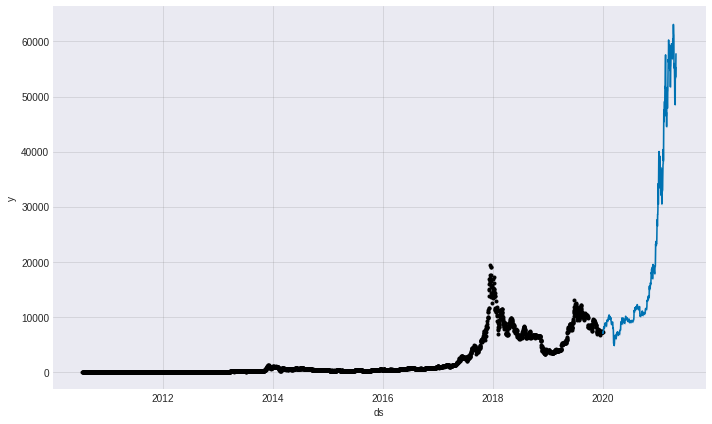

In [181]:
df_valid["Forecast_Prophet"] = forecast.yhat.values
fig1 = model_fbp.plot(forecast)


Narrative

*   Black dots : the actual data points in our dataset.
*   Deep blue line : the predicted forecast/the predicted values
*   Light blue line : the boundaries

# XG Boost

In [182]:
X_train, y_train = df_train[exogenous_features], df_train.Price
X_test, y_test = df_valid[exogenous_features], df_valid.Price

In [183]:
reg = xgb.XGBRegressor()

In [184]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
 "max_depth"        : [1, 3, 4, 5, 6, 7],
 "n_estimators"     : [int(x) for x in np.linspace(start=100, stop=2000, num=10)],
 "min_child_weight" : [int(x) for x in np.arange(3, 15, 1)],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "subsample"        : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bytree" : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bylevel": [0.5, 0.6, 0.7, 0.8, 0.9, 1],  
 
}

In [185]:
model  = RandomizedSearchCV(    
                reg,
                param_distributions=params,
                n_iter=10,
                n_jobs=-1,
                cv=5,
                verbose=3,
)

In [186]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   48.4s finished


[18:20:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                                  0.6, 0.7, 0.8, 0.9, 1],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                  

In [187]:
print(f"Model Best Score : {model.best_score_}")
print(f"Model Best Parameters : {model.best_estimator_.get_params()}")

Model Best Score : 0.7428423557488496
Model Best Parameters : {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 0.5, 'colsample_bynode': 1, 'colsample_bytree': 0.7, 'gamma': 0.4, 'importance_type': 'gain', 'learning_rate': 0.25, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 6, 'missing': None, 'n_estimators': 944, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 0.7, 'verbosity': 1}


In [188]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
             importance_type='gain', learning_rate=0.25, max_delta_step=0,
             max_depth=5, min_child_weight=6, missing=None, n_estimators=944,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



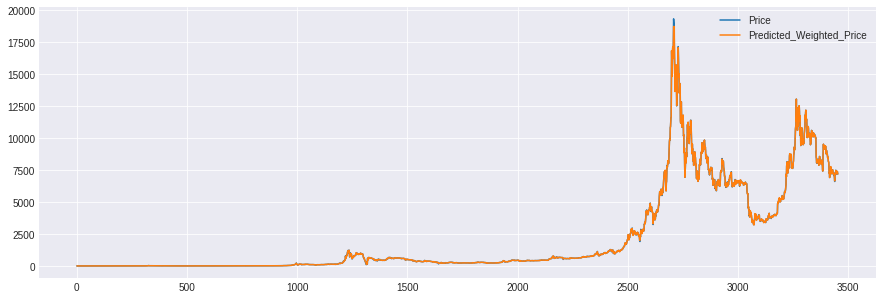

In [189]:
df_train['Predicted_Weighted_Price'] = model.predict(X_train)
df_train[['Price','Predicted_Weighted_Price']].plot(figsize=(15, 5))

In [190]:
df_valid['Forecast_XGBoost'] = model.predict(X_test)

overall_data = pd.concat([df_train, df_valid], sort=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



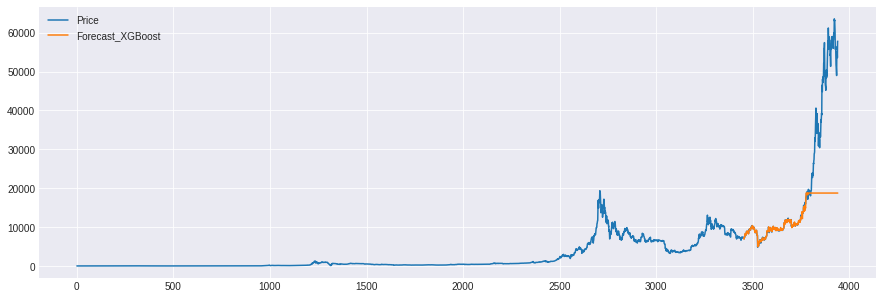

In [191]:
overall_data[['Price','Forecast_XGBoost']].plot(figsize=(15, 5))

# LSTM

In [192]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM , Dense

In [193]:
dataset = df.values
dataset = np.delete(dataset,0,1)
dataset = np.delete(dataset,5,1)

In [194]:
train_size = int(len(dataset) * 0.9699)
test_size = len(dataset) - train_size
test, train = dataset[0:test_size,0:1], dataset[test_size:len(dataset),1:2]
print(len(train), len(test))
print(train.shape[1], test.shape[1])

3822 119
1 1


In [195]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [196]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainY.shape

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

tensor_trainX = tf.convert_to_tensor(trainX, np.float32)
tensor_testX = tf.convert_to_tensor(testX, np.float32)

In [197]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(tensor_trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
3821/3821 - 6s - loss: 104582840.0000
Epoch 2/50
3821/3821 - 4s - loss: 104513152.0000
Epoch 3/50
3821/3821 - 4s - loss: 104451560.0000
Epoch 4/50
3821/3821 - 4s - loss: 104389456.0000
Epoch 5/50
3821/3821 - 4s - loss: 104328832.0000
Epoch 6/50
3821/3821 - 4s - loss: 104267744.0000
Epoch 7/50
3821/3821 - 4s - loss: 104205744.0000
Epoch 8/50
3821/3821 - 4s - loss: 104145488.0000
Epoch 9/50
3821/3821 - 4s - loss: 104083904.0000
Epoch 10/50
3821/3821 - 4s - loss: 104022992.0000
Epoch 11/50
3821/3821 - 4s - loss: 103962736.0000
Epoch 12/50
3821/3821 - 4s - loss: 103901536.0000
Epoch 13/50
3821/3821 - 4s - loss: 103840864.0000
Epoch 14/50
3821/3821 - 4s - loss: 103781040.0000
Epoch 15/50
3821/3821 - 4s - loss: 103718960.0000
Epoch 16/50
3821/3821 - 4s - loss: 103659744.0000
Epoch 17/50
3821/3821 - 5s - loss: 103599776.0000
Epoch 18/50
3821/3821 - 4s - loss: 103539984.0000
Epoch 19/50
3821/3821 - 4s - loss: 103481344.0000
Epoch 20/50
3821/3821 - 4s - loss: 103421488.0000
Epoch 21/

make predictions

In [198]:
trainPredict = model.predict(tensor_trainX)
testPredict = model.predict(tensor_testX)

calculate root mean squared error

In [199]:
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 10109.24 RMSE
Test Score: 0.44 RMSE
